# Insert Libraries

In [1]:
import jsonlines
import io
import numpy as np
from klepto.archives import file_archive as FileArchive
import random

# Insert sklearn libraries

In [2]:
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA

# Insert matplotlib

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Feature Extraction

In [4]:
FeaturesContain=['NoInstruc','Nocalls','NoStoreData','NoLogicalComp','NoTransFun','NoComp','NoArimFun']
 
NoCallsValue=0
NoInstrucValue=0
NoStoreDataValue=0
NoLogicalCompValue=0
NoTransFunValue=0
NoCompValue=0
NoArimFunValue=0

NameofFeatures={'Nocalls':NoCallsValue,'NoInstruc':NoInstrucValue,'NoStoreData':NoStoreDataValue,'NoLogicalComp':NoLogicalCompValue,'NoTransFun':NoTransFunValue,'NoComp':NoCompValue,'NoArimFun':NoArimFunValue}
NameofOPTs={'H':1,'L':0}
NameofCompilers={'icc':0,'clang':1,'gcc':2}


def Nocalls():
    NameofFeatures['Nocalls']+=1
def NoStoreData():
    NameofFeatures['NoStoreData']+=1
def NoLogicalComp():
    NameofFeatures['NoLogicalComp']+=1
def NoTransFun():
    NameofFeatures['NoTransFun']+=1
def NoInstruc(l_instructions):
    NameofFeatures['NoInstruc']=len(l_instructions)
def NoComp():
    NameofFeatures['NoComp']+=1
def NoArimFun():
    NameofFeatures['NoArimFun']+=1

contentofFeatures={'call':Nocalls,'push':NoStoreData,   'test':NoLogicalComp,   'je':NoTransFun     ,'cmovae':NoComp    ,'sub':NoArimFun
                         ,'mov':NoStoreData ,   'cmp':NoLogicalComp ,   'jmp':NoTransFun                        ,'add':NoArimFun
                         ,'pop':NoStoreData ,   'xor':NoLogicalComp ,   'jne':NoTransFun                        ,'imul':NoArimFun
                         ,'shl':NoStoreData                         ,   'ret':NoTransFun
                         ,'lea':NoStoreData                         ,   'seta':NoTransFun
                         ,'movsxd':NoStoreData                      ,   'jg':NoTransFun
                         ,'movzx':NoStoreData  
                         ,'movsxd':NoStoreData  
          } 
nodefined=[]
print('Features done!')

Features done!


In [5]:
def FeatureSpecification(lengthofInstructions):
    if lengthofInstructions[0] in contentofFeatures:
        lengthofValues = contentofFeatures[lengthofInstructions[0]]()
    else:
        if lengthofInstructions[0] in nodefined:
            pass
        else:
            pass



In [6]:
def Features(instructions):
    lengthofInstructions = []
    lengthofFeatures = dict()

    for instruction in instructions['instructions']:
        InstructionSplitting = instruction.split(' ')
        lengthofInstructions.append(InstructionSplitting)
        FeatureSpecification(InstructionSplitting)

    NoInstruc(lengthofInstructions)
    AppendFeatures = []
    for xsf in FeaturesContain:
        AppendFeatures.append(NameofFeatures[xsf])
        NameofFeatures[xsf]=0
    appendFeaturesData = np.array(AppendFeatures)
    instructions['instructions'] = lengthofInstructions    
    readFeatureData.append(appendFeaturesData)
    instructions['features'] = lengthofFeatures
    return instructions


In [7]:
readInstructions=[]
readFeatureData=[]
readOPTs=[]
readCompilers=[]
with jsonlines.open("train_dataset.jsonl") as reader: #open json file as reader
    for _instructions in reader: #read every line of json file
        readInstructions.append(Features(_instructions))
        readOPTs.append(NameofOPTs[_instructions['opt']])
        readCompilers.append(NameofCompilers[_instructions['compiler']])

print('JSON file reading done')

JSON file reading done


In [8]:
db = FileArchive("FeatureExtraction.txt")
db['featuresnames']=FeaturesContain
db['featuresdata']=readFeatureData
db['opt']=readOPTs
db['G_opt']=NameofOPTs
db['compiler']=readCompilers
db['G_compiler']=NameofCompilers
db.dump()

In [9]:
db = FileArchive("FeatureExtraction.txt")
db.load()

FeaturesContain = db['featuresnames']
readFeatureData = db['featuresdata']
opt = db['opt']        
NameofOPTs = db['G_opt']      
compiler = db['compiler']  
NameofCompilers=db['G_compiler'] 
db.drop()

In [10]:
DB = datasets.load_iris()
dataset_name = "Iris"
DB = datasets.load_digits()
dataset_name = "Digits"

class_names = np.array(FeaturesContain)
numberofSamples = 30000 
kj = DB.data
lp = DB.target
X_all = np.array(readFeatureData[0:numberofSamples])
y_all = np.array(opt[0:numberofSamples])


In [11]:
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of samples: %d" %(X_all.shape[0]))

Number of attributes/features: 7
Number of samples: 20


# Splitting 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, 
                                                    random_state=109)
#splitted training=21000 and test of 9000
print("Number of training set is: %d" %X_train.shape[0])
print("Number of test set is: %d" %X_test.shape[0])


Number of training set is: 14
Number of test set is: 6


# Implementing SVM 

In [13]:
model = svm.SVC(kernel='linear', probability=True, tol=0.001) #using sklearn implement svm
model.fit(X_train, y_train) #fitting into model
y_pred = model.predict(X_test) #predicting 
precisSVM = metrics.precision_score(y_test, y_pred) #finding precision value
recallSVM = metrics.recall_score(y_test, y_pred) #finding recall value
accurSVM = metrics.accuracy_score(y_test, y_pred) #finding accuracy value 
print("Accuracy: ", accurSVM)
print("Precision: ", precisSVM)
print("Recall: ", recallSVM)
print('\n')

print('Done with SVM')

Accuracy:  0.3333333333333333
Precision:  0.3333333333333333
Recall:  1.0


Done with SVM


# Plotting SVM

<class 'numpy.ndarray'>


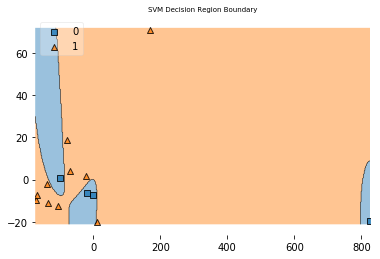

In [14]:
print(type(X_train))
#plt.scatter(X_train[:, 0], X_train[:, 1],  c = y_train, s=40)
clf = svm.SVC(C=30000,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)


plt.title('SVM Decision Region Boundary', size=7)
plt.show()

# Implementing Decision Trees

In [15]:
decTreeClass = DecisionTreeClassifier()
decTreeClass = decTreeClass.fit(X_train, y_train)

y_predDecisionTree = decTreeClass.predict(X_test)
print("Accuracy for Decision Tree: ", metrics.accuracy_score(y_test, y_predDecisionTree))
print("Precision for Decision Tree: ", metrics.precision_score(y_test, y_predDecisionTree))
print("Recall for Decision Tree: ", metrics.recall_score(y_test, y_predDecisionTree))

Accuracy for Decision Tree:  0.5
Precision for Decision Tree:  0.4
Recall for Decision Tree:  1.0
